<a href="https://colab.research.google.com/github/kshashank03/data-science-projects/blob/master/Classification_Models/detecting_heavy_drinking_using_motion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Accelerometer Data to Detect Heavy Drinking

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import string

In [60]:
files = glob.glob("/content/drive/My Drive/Data Science/Detecting Heavy Drinking Episodes/data/clean_tac/*.csv")
TAC_data = None

for i, f in enumerate (files):
    if i == 0:
        TAC_data = pd.read_csv(f)
        TAC_data['Participant'] = f[86:92] + "_TAC"
    else:
        tmp = pd.read_csv(f)
        tmp['Participant'] = f[86:92] + "_TAC"
        TAC_data = TAC_data.append(tmp)


TAC_data['timestamp'] = TAC_data['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
TAC_data.head()

,timestamp,TAC_Reading,Participant
0,2017-05-02 09:18:43,-0.010229,SA0297_TAC
1,2017-05-02 09:49:06,-0.002512,SA0297_TAC
2,2017-05-02 09:54:23,0.003249,SA0297_TAC
3,2017-05-02 09:59:39,0.005404,SA0297_TAC
4,2017-05-02 10:04:55,0.003377,SA0297_TAC


In [0]:
TAC_data_pivot = TAC_data.pivot(index='timestamp', columns='Participant', values='TAC_Reading')
TAC_data_pivot.fillna(0, inplace=True)

In [62]:
TAC_data_pivot.head()
#TAC_data_pivot.iloc[:,0]
#TAC_data_pivot.columns =  TAC_data_pivot.columns
#TAC_data_pivot.index()

Participant,BK7610_TAC,BU4707_TAC,CC6740_TAC,DC6359_TAC,DK3500_TAC,HV0618_TAC,JB3156_TAC,JR8022_TAC,MC7070_TAC,MJ8002_TAC,PC6771_TAC,SA0297_TAC,SF3079_TAC
timestamp,,,,,,,,,,,,,
2017-05-02 09:18:43,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.010229,0.0
2017-05-02 09:37:39,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.000000,0.0
2017-05-02 09:49:06,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.002512,0.0
2017-05-02 09:51:54,-0.000482,-0.000482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2017-05-02 09:54:23,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003249,0.0


In [77]:
TAC_data_pivot.head()
type(TAC_data_pivot.index[len(TAC_data_pivot.index)/2])
print(len(TAC_data_pivot.index))

658


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


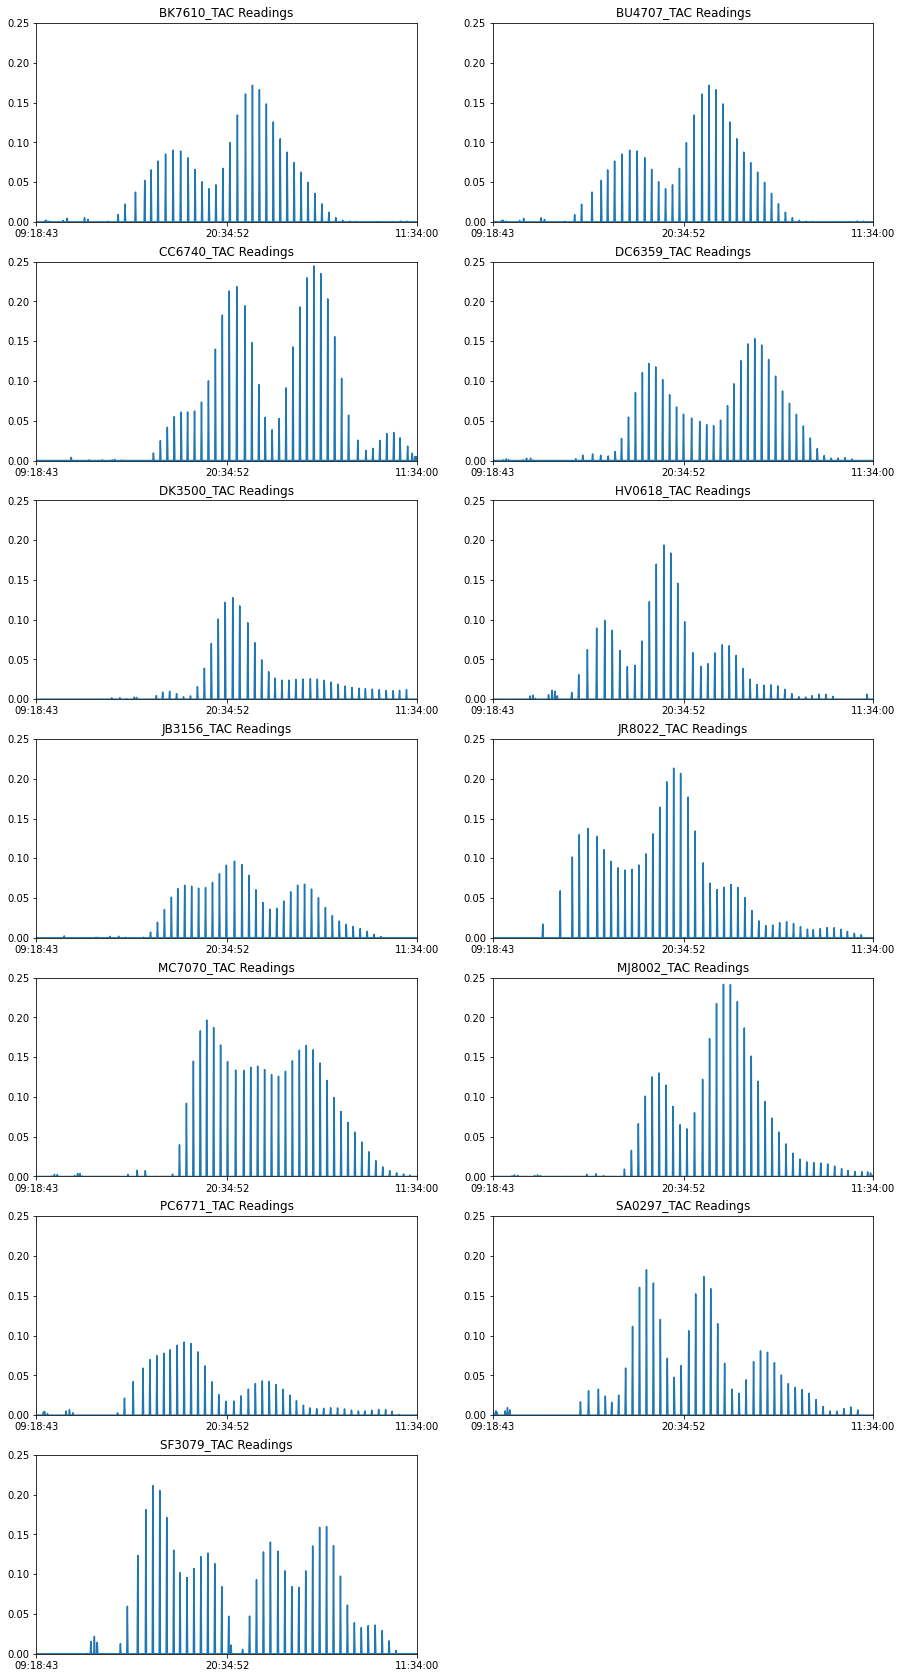

In [119]:
plt.figure(figsize=(15, 30))
x=1
date_min = TAC_data_pivot.index[0]
date_max = TAC_data_pivot.index[len(TAC_data_pivot.index)-1]
date_mid = TAC_data_pivot.index[len(TAC_data_pivot.index)/2]

for i in TAC_data_pivot.columns:
  plt.subplot(7, 2, x)
  plt.subplot(7, 2, x).set_xticks([0, len(TAC_data_pivot[i])/2, len(TAC_data_pivot[i])-1])
  plt.subplot(7, 2, x).set_xticklabels([date_min[-8:], date_mid[-8:], date_max[-8:]])
  plt.plot(TAC_data_pivot[i])
  plt.ylim(0.00, 0.25)
  plt.xlim(date_min, date_max)
  plt.title(i + " Readings")
  x+=1